# 입문자를 위한, 파이썬/R 데이터 분석

## Today's mission

- 워드클라우드 : 다음뉴스 키워드 검색 및 텍스트 분석
- 워드클라우드 : soynlp 라이브러리 활용 명사 추출

## 워드클라우드 : 다음뉴스 키워드 검색 및 텍스트 분석

참고 : 다음 뉴스 사이트 기사목록 크롤링 및 텍스트 분석

In [ ]:
#!pip install konlpy
#!pip install wordcloud

- [KoNLPy를 위한 자바 설치](https://www.codeit.kr/tutorials/43/KoNLPy-%EC%84%A4%EC%B9%98%ED%95%98%EA%B8%B0-Windows)

In [1]:
import requests
from bs4 import BeautifulSoup
import re
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time

- 검색어 및 검색페이지 수 입력

In [2]:
# 검색어 입력
keyword = input("검색어를 입력하세요.")

In [3]:
# 검색페이지 입력
lastpage = int(input("마지막 페이지 번호를 입력하세요."))

- 다음 뉴스 검색 : 상기 검색어 및 페이지수 활용

In [4]:
titleList = []

for i in range(1, lastpage+1, 1) :
    #url = f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}&start=[{i}]"
    url = f"https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q={keyword}&p={i}"
    print(url)
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    titles = soup.select("ul.c-list-basic")
    #subtitles = soup.select("a.elss.sub_tit")
    
    for title in titles : # titles에서 title
        titleText = title.text # title.text만 추출
        #print(titleText)
        titleList.append(titleText) # titleList에 추가
    
    time.sleep(2)

https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=매트릭스&p=1
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=매트릭스&p=2
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=매트릭스&p=3
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=매트릭스&p=4
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=매트릭스&p=5


In [5]:
titleList[0]

'            머니투데이       개별문서메뉴  톡으로 바로 공유 공유하기           3         "정치계의 반고흐, 매트릭스 대신 매트럼프" 총격사건 패러디 봇물       X·옛 트위터)에 "트럼프 전 대통령은 이제 부인할 수 없는 미국 정치계의 반 고흐"라고 평가했다. 영화 매트릭스의 한 장면을 패러디한 그림도 있었다. 매트릭스 속 주인공이 날아오는 총알을 피하는 것처럼, 트럼프 전 대통령도 총알을 피한다는 내용이다. 이 그림...    16시간전                 지디넷코리아       개별문서메뉴  톡으로 바로 공유 공유하기                 알테어, ‘매트릭스 디자인 오토메이션’ 인수       전문기업 알테어는 반도체 전자 기능 시뮬레이션 및 설계 검증 시뮬레이션 서비스 기업인 ‘매트릭스 오토메이션 디자인(이하 매트릭스)’을 인수했다고 3일 밝혔다. 매트릭스의 대표 제품인 DSim은 설계된 회로나 시스템을 가상 환경에서 테스트하고, 시뮬레이션...    2024.07.03                 스타뉴스       개별문서메뉴  톡으로 바로 공유 공유하기                 [포토] 이도윤 \'매트릭스는 무리였어\'       [스타뉴스 | 고척=김진경 대기자] [포토] 이도윤 \'매트릭스는 무리였어\' \'2024 신한 SOL 뱅크 KBO리그\' 키움-한화전이 10일 서울 고척스카이돔에서 열렸다. 한화 이도윤이 5회초 2사 1,2루에서 2타점 적시 2루타를 날린 후 3루까지 뛰다 키움 3루수 송성문에 태그...    2024.07.10                 머니투데이       개별문서메뉴  톡으로 바로 공유 공유하기           2         비즈매트릭스, \'2024 인공지능&빅데이터쇼\'에서 \'BzEngage\' 및 \'BzWorks\' 선봬       비즈매트릭스(Bizmatrixx, 대표 권영해)는 6월 21일까지 서울 삼성동 코엑스에서 개최된 \'2024 인공

In [6]:
# 한글만 추출
def text_cleaning(text) :
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

In [7]:
text_cleaning(titleList[0])

'            머니투데이       개별문서메뉴  톡으로 바로 공유 공유하기                    정치계의 반고흐 매트릭스 대신 매트럼프 총격사건 패러디 봇물       옛 트위터에 트럼프 전 대통령은 이제 부인할 수 없는 미국 정치계의 반 고흐라고 평가했다 영화 매트릭스의 한 장면을 패러디한 그림도 있었다 매트릭스 속 주인공이 날아오는 총알을 피하는 것처럼 트럼프 전 대통령도 총알을 피한다는 내용이다 이 그림    시간전                 지디넷코리아       개별문서메뉴  톡으로 바로 공유 공유하기                 알테어 매트릭스 디자인 오토메이션 인수       전문기업 알테어는 반도체 전자 기능 시뮬레이션 및 설계 검증 시뮬레이션 서비스 기업인 매트릭스 오토메이션 디자인이하 매트릭스을 인수했다고 일 밝혔다 매트릭스의 대표 제품인 은 설계된 회로나 시스템을 가상 환경에서 테스트하고 시뮬레이션                     스타뉴스       개별문서메뉴  톡으로 바로 공유 공유하기                 포토 이도윤 매트릭스는 무리였어       스타뉴스  고척김진경 대기자 포토 이도윤 매트릭스는 무리였어  신한  뱅크 리그 키움한화전이 일 서울 고척스카이돔에서 열렸다 한화 이도윤이 회초 사 루에서 타점 적시 루타를 날린 후 루까지 뛰다 키움 루수 송성문에 태그                     머니투데이       개별문서메뉴  톡으로 바로 공유 공유하기                    비즈매트릭스  인공지능빅데이터쇼에서  및  선봬       비즈매트릭스 대표 권영해는 월 일까지 서울 삼성동 코엑스에서 개최된  인공지능빅데이터쇼에서 크로스채널 고객 경험 플랫폼 와 프로젝트 및 태스크 기반 업무 관리 솔루션 를 선보이며 주목을 받았다고 밝혔다 권영해                     이데일리       개별문서메뉴  톡으로 바로 공유 공유하기                 퀀타매트릭스 차세대 

- [map 과 lambda 참고](https://wikidocs.net/32#map)

In [8]:
# 전처리 : 한글만 추출
titleList = list(map(lambda x:text_cleaning(x), titleList))

In [9]:
titleList[0]

'            머니투데이       개별문서메뉴  톡으로 바로 공유 공유하기                    정치계의 반고흐 매트릭스 대신 매트럼프 총격사건 패러디 봇물       옛 트위터에 트럼프 전 대통령은 이제 부인할 수 없는 미국 정치계의 반 고흐라고 평가했다 영화 매트릭스의 한 장면을 패러디한 그림도 있었다 매트릭스 속 주인공이 날아오는 총알을 피하는 것처럼 트럼프 전 대통령도 총알을 피한다는 내용이다 이 그림    시간전                 지디넷코리아       개별문서메뉴  톡으로 바로 공유 공유하기                 알테어 매트릭스 디자인 오토메이션 인수       전문기업 알테어는 반도체 전자 기능 시뮬레이션 및 설계 검증 시뮬레이션 서비스 기업인 매트릭스 오토메이션 디자인이하 매트릭스을 인수했다고 일 밝혔다 매트릭스의 대표 제품인 은 설계된 회로나 시스템을 가상 환경에서 테스트하고 시뮬레이션                     스타뉴스       개별문서메뉴  톡으로 바로 공유 공유하기                 포토 이도윤 매트릭스는 무리였어       스타뉴스  고척김진경 대기자 포토 이도윤 매트릭스는 무리였어  신한  뱅크 리그 키움한화전이 일 서울 고척스카이돔에서 열렸다 한화 이도윤이 회초 사 루에서 타점 적시 루타를 날린 후 루까지 뛰다 키움 루수 송성문에 태그                     머니투데이       개별문서메뉴  톡으로 바로 공유 공유하기                    비즈매트릭스  인공지능빅데이터쇼에서  및  선봬       비즈매트릭스 대표 권영해는 월 일까지 서울 삼성동 코엑스에서 개최된  인공지능빅데이터쇼에서 크로스채널 고객 경험 플랫폼 와 프로젝트 및 태스크 기반 업무 관리 솔루션 를 선보이며 주목을 받았다고 밝혔다 권영해                     이데일리       개별문서메뉴  톡으로 바로 공유 공유하기                 퀀타매트릭스 차세대 

- 텍스트 전처리 : 명사의 빈도수 계산

In [10]:
# 텍스트 전처리
title_corpus = " ".join(titleList) # 말뭉치
nouns_tagger = Okt() # 명사 추출
nouns = nouns_tagger.nouns(title_corpus)

In [11]:
nouns[:10]

['머니투데이', '개별', '문서', '메뉴', '톡', '바로', '공유', '공유', '정치계', '반고흐']

In [12]:
count = Counter(nouns) # 각 명사의 빈도수 계산

In [19]:
# 각 명사의 빈도수 계산
count

Counter({'머니투데이': 4,
         '개별': 50,
         '문서': 53,
         '메뉴': 50,
         '톡': 50,
         '바로': 51,
         '공유': 101,
         '정치계': 3,
         '반고흐': 2,
         '매트릭스': 112,
         '대신': 1,
         '트럼프': 33,
         '총격': 2,
         '사건': 4,
         '패러디': 10,
         '봇물': 3,
         '트위터': 2,
         '전': 10,
         '대통령': 7,
         '이제': 1,
         '부인': 1,
         '수': 3,
         '미국': 6,
         '반': 10,
         '고흐': 11,
         '평가': 2,
         '영화': 17,
         '장면': 7,
         '그림': 6,
         '속': 4,
         '주인공': 6,
         '총알': 8,
         '피하': 4,
         '것': 17,
         '피': 5,
         '내용': 2,
         '이': 7,
         '간전': 11,
         '넷': 6,
         '코리아': 9,
         '알테어': 2,
         '디자인': 8,
         '오토메이션': 3,
         '인수': 2,
         '전문': 1,
         '기업': 7,
         '반도체': 1,
         '전자': 1,
         '기능': 1,
         '시뮬레이션': 3,
         '및': 6,
         '설계': 2,
         '검증': 1,
         '서비스': 2

- 텍스트 전처리 : 불용어 처리

In [14]:
# 불용어처리명
remove_char_counter = Counter({x:count[x] for x in count if len(x) > 1})

# 불용어 텍스트 파일 경로
korean_stopwords_path = "data/stopwords-ko.txt"

# 불용어 로드
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 나무위키에서 추가한 불용어
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명',
                       '표기', '추가', '모든', '사용', '매우', '가장', '줄거리',
                       '요소', '상황', '편집', '틀', '경우', '때문', '모습',
                       '정도', '이후', '사실', '생각', '인물', '이름', '년월', '공유', 
                       '메뉴'] ##### 개별적 불용어 추가

# 불용어 추가
stopwords.extend(namu_wiki_stopwords)

# 불용어 처리
remove_char_counter = Counter({x:remove_char_counter[x] for x in remove_char_counter if x not in stopwords})

In [15]:
remove_char_counter

Counter({'머니투데이': 4,
         '개별': 50,
         '정치계': 3,
         '반고흐': 2,
         '매트릭스': 112,
         '대신': 1,
         '트럼프': 33,
         '총격': 2,
         '사건': 4,
         '패러디': 10,
         '봇물': 3,
         '트위터': 2,
         '대통령': 7,
         '이제': 1,
         '부인': 1,
         '미국': 6,
         '고흐': 11,
         '평가': 2,
         '영화': 17,
         '장면': 7,
         '그림': 6,
         '주인공': 6,
         '총알': 8,
         '피하': 4,
         '간전': 11,
         '코리아': 9,
         '알테어': 2,
         '디자인': 8,
         '오토메이션': 3,
         '인수': 2,
         '전문': 1,
         '기업': 7,
         '반도체': 1,
         '기능': 1,
         '시뮬레이션': 3,
         '설계': 2,
         '검증': 1,
         '서비스': 2,
         '기업인': 1,
         '이하': 1,
         '대표': 13,
         '제품': 3,
         '회로': 1,
         '시스템': 8,
         '가상': 1,
         '환경': 3,
         '테스트': 1,
         '스타': 4,
         '뉴스': 8,
         '포토': 4,
         '이도윤': 3,
         '고척': 2,
         '김진경': 3,
         

- 텍스트 전처리 : 명사의 분석 대상 갯수 지정

In [22]:
# 빈도수 특정 명사의 갯수 지정
ranked_tags = remove_char_counter.most_common(50) # 빈도순 n개 단어

In [23]:
#ranked_tags

In [24]:
pd.DataFrame(ranked_tags)

,0,1
0,매트릭스,112
1,개별,50
2,비아이,35
3,트럼프,33
4,기자,21
5,솔루션,19
6,성형,19
7,영화,17
8,대표,13
9,이데일리,13


- 워드클라우드

In [25]:
####### [WordCloud 오류 해결]
#!pip install --upgrade pip
#!pip install --upgrade Pillow

In [26]:
#remove_char_counter

In [27]:
### 워드클라우드
wc = WordCloud(font_path='data/malgun.ttf', width=1200, height=500,
               scale=4.0, max_font_size=600, background_color='white')
gen = wc.generate_from_frequencies(remove_char_counter)

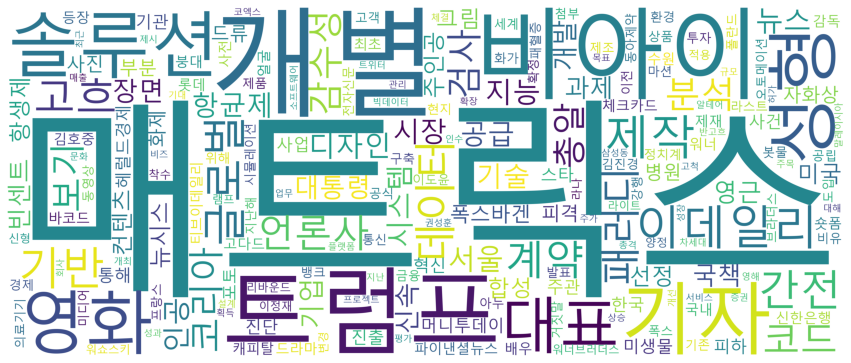

In [28]:
# 워드클라우드 그리기 및 파일로 저장
plt.figure(figsize=(15, 7))
plt.imshow(gen)
plt.axis('off')
plt.savefig(f'data/daumNews_wc_{keyword}.png')

In [29]:
### 워드클라우드 상위 N개 대상
wc = WordCloud(font_path='data/malgun.ttf', width=1200, height=500,
               scale=4.0, max_font_size=600, background_color='white')
gen = wc.generate_from_frequencies(dict(ranked_tags))

(-0.5, 4799.5, 1999.5, -0.5)

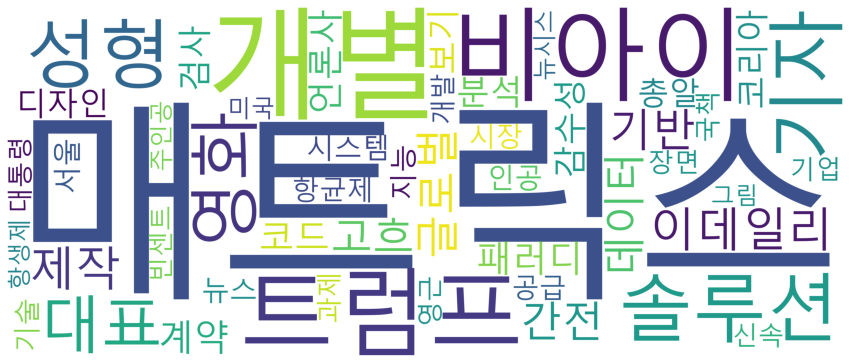

In [31]:
# 워드클라우드 그리기 및 파일로 저장
plt.figure(figsize=(15, 7))
plt.imshow(gen)
plt.axis('off')
# plt.savefig(f'data/daumNews_wcN_{keyword}.png')